# Data Science Project: Titanic Project

**Description of the project**
What is the project description on Kaggle's website

What are the variables included in csv's and what do they mean?

Import statements we will use:

In [20]:
#Importing and manipulating data
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn.ensemble as ske

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Algorithms
from sklearn import cross_validation, preprocessing, datasets, model_selection, tree, metrics, svm, linear_model

In [21]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [22]:
plt.style.use('ggplot')
%matplotlib inline

In [23]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')
titanic = train_df.append(test_df, ignore_index = True, sort = False)

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


We can see that there are 1309 entries however values such as Age, Fare, Cabin and Embarked have missing values. This data set is 'dirty' and we will need to clean this up in the future. 

Let's have pandas do the math and tell us exactly how many values are missing in each column. 

In [26]:
#Number of missing values per Column
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [27]:
titanic['Survived'].mean()

0.3838383838383838

38 % is not a lot of survivors

In [28]:
titanic.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,672.492260,0.629630,39.159930,0.436533,0.365325,87.508992
2,671.566787,0.472826,29.506705,0.393502,0.368231,21.179196
3,640.558533,0.242363,24.816367,0.568406,0.400564,13.302889


In [29]:
class_sex_group = titanic.groupby(['Pclass', 'Sex']).mean()
class_sex_group

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   689.652778  0.968085  37.037594  0.555556  0.472222   
       male     658.687151  0.368852  41.029272  0.340782  0.279330   
2      female   632.188679  0.921053  27.499223  0.500000  0.650943   
       male     695.976608  0.157407  30.815380  0.327485  0.192982   
3      female   628.393519  0.500000  22.185329  0.791667  0.731481   
       male     645.888438  0.135447  25.962264  0.470588  0.255578   

                     Fare  
Pclass Sex                 
1      female  109.412385  
       male     69.888385  
2      female   23.234827  
       male     19.904946  
3      female   15.324250  
       male     12.415462

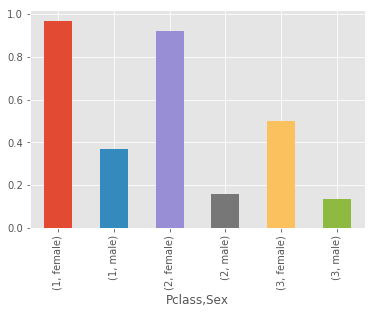

In [37]:
#Grouping of male/female survival divided by class
class_sex_group['Survived'].plot.bar()

In [47]:
#Encodes string values to integers so we can work with them nicely
def encoder(df):
	processed_df = df.copy()
	le = preprocessing.LabelEncoder()
	
	#Turns 'female' and 'male' values to 0 and 1 respectively
	processed_df.Sex = le.fit_transform(processed_df.Sex)
	
	#Turns Embarked locations to 0, 1, 2, 3
	#0 == Missing Value
	#1 == Cherbourg (C)
	#2 == Queens (Q)
	#3 == Southampton (S)
	processed_df.Embarked = le.fit_transform(processed_df.Embarked.fillna('0'))
	processed_df.Age = processed_df.Age.fillna(processed_df.Age.mean())
	processed_df = processed_df.drop(['Name', 'Ticket', 'Cabin', 'Fare'], axis=1)
	return processed_df

In [54]:
processed_df = encoder(train_df)

In [55]:
processed_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [56]:
X = processed_df.drop(['Survived'], axis = 1).values
y = processed_df['Survived'].values

In [57]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [58]:
#Decision Tree
clf_dt = tree.DecisionTreeClassifier(max_depth = 10)

In [59]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.776536312849162

In [60]:
shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter = 20, test_size = 0.2, random_state = 0)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv = shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [61]:
test_classifier(clf_dt)

Accuracy: 0.7718 (+/- 0.03)


In [62]:
clf_rf = ske.RandomForestClassifier(n_estimators = 50)
test_classifier(clf_rf)

Accuracy: 0.8067 (+/- 0.03)


In [63]:
clf_gb = ske.GradientBoostingClassifier(n_estimators = 50)
test_classifier(clf_gb)

Accuracy: 0.8299 (+/- 0.03)


In [64]:
eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
test_classifier(eclf)

Accuracy: 0.8179 (+/- 0.03)
